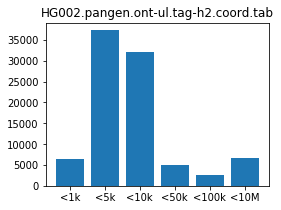

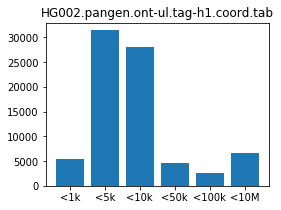

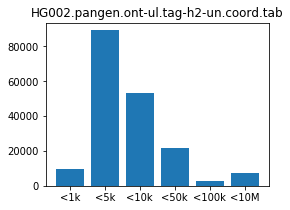

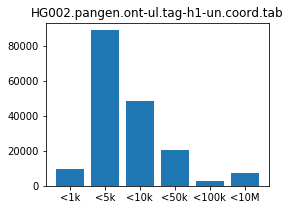

In [22]:
%matplotlib inline

import os as os
import matplotlib.pyplot as plt
import collections as col
import pandas as pd
import numpy as np

path = '/MMCI/TM/scratch/pebert/diploid_assembly/output/assembly_analysis/mummer'
tab_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('coord.tab')]

bins = [0, 1000, 5000, 10000, 50000, 100000, 10000000]
htype = {'density': False, 'histtype': 'bar'}
for t in tab_files:
    df = pd.read_csv(t, sep='\t', skiprows=3)
    bincount = np.digitize(df['[LEN 1]'], bins, right=False)
    aln_counts = col.Counter(bincount)
    bar_height = [aln_counts[b] for b in sorted(aln_counts.keys())]
    
    fig, ax = plt.subplots(figsize=(4,3))
    ax.set_title(os.path.basename(t))
    ax.bar(sorted(aln_counts.keys()), bar_height)
    ax.set_xticks(sorted(aln_counts.keys()))
    ax.set_xticklabels(['<1k', '<5k', '<10k', '<50k', '<100k', '<10M'])
    